In [26]:
#Solving Tsp using Ant Colony Optimization

#importing libraries
import numpy as np
import pandas as pd
import math
import operator
import random
import matplotlib.pyplot as plt

In [27]:
class City:
  # Defining a city as a 2d point
  def __init__(self, x, y):
    self.x = x
    self.y = y
  
  # Defining a method to return distance between our city and a given city
  def distance(self, city):
    xCor = abs(self.x - city.x)
    yCor = abs(self.y - city.y)
    dist = np.sqrt(xCor ** 2 + yCor ** 2)
    return dist

  # Defining the representationof a city
  def __repr__(self):
    return "(" + str(self.x) + "," + str(self.y) + ")"  

In [28]:
def create_distance_matrix(coordinates):
    n = len(coordinates)
    distance_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            distance_matrix[i, j] = np.linalg.norm(np.array(coordinates[i]) - np.array(coordinates[j]))
    return distance_matrix

In [29]:
citylist = []
for i in range(0,25):
    citylist.append(City(x=int(random.random() * 200), y=int(random.random() * 200)))

print("Cities : ", citylist)

distance_matrix = create_distance_matrix([[city.x, city.y] for city in citylist])

Cities :  [(52,111), (163,123), (57,13), (115,31), (154,25), (109,189), (76,40), (116,62), (54,34), (167,124), (175,147), (112,51), (103,27), (169,18), (77,77), (71,129), (165,147), (134,16), (41,10), (34,185), (140,104), (113,162), (35,71), (134,59), (68,194)]


In [30]:
num_ants = 100
num_iterations = 500
alpha = 1.0  # Importance of pheromone
beta = 2.0   # Importance of heuristic value
evaporation_rate = 0.5
Q = 1.0

In [31]:
#Helper functions
def initialize_pheromone_matrix(n):
    return np.ones((n, n))

def calculate_probabilities(pheromone, visibility, alpha, beta):
    return (pheromone ** alpha) * (visibility ** beta)

def update_pheromones(pheromones, delta_pheromones, evaporation_rate):
    return (1 - evaporation_rate) * pheromones + delta_pheromones

def delta_pheromones_for_ant(ant_path, Q, distance_matrix):
    n = len(ant_path)
    delta_pheromones = np.zeros((n, n))
    for i in range(n - 1):
        delta_pheromones[ant_path[i], ant_path[i + 1]] = Q / distance_matrix[ant_path[i], ant_path[i + 1]]
    delta_pheromones[ant_path[-1], ant_path[0]] = Q / distance_matrix[ant_path[-1], ant_path[0]]
    return delta_pheromones

In [32]:
# Implementing the Ant Colony Optimization algorithm
def aco_tsp(distance_matrix, num_ants, num_iterations, alpha, beta, evaporation_rate, Q):
    num_nodes = distance_matrix.shape[0]
    pheromone_matrix = initialize_pheromone_matrix(num_nodes)
    best_path = None
    best_path_length = np.inf
    
    visibility = 1 / (distance_matrix + np.eye(num_nodes))  # Adding np.eye to avoid division by zero

    for iteration in range(num_iterations):
        ant_paths = []
        for ant in range(num_ants):
            visited_nodes = [np.random.randint(num_nodes)]
            while len(visited_nodes) < num_nodes:
                current_node = visited_nodes[-1]
                probabilities = calculate_probabilities(pheromone_matrix[current_node], visibility[current_node], alpha, beta)
                probabilities[visited_nodes] = 0
                probabilities /= probabilities.sum()
                next_node = np.random.choice(range(num_nodes), p=probabilities)
                visited_nodes.append(next_node)
            ant_paths.append(visited_nodes)
        
        all_delta_pheromones = np.zeros((num_nodes, num_nodes))
        for path in ant_paths:
            path_length = sum(distance_matrix[path[i], path[i+1]] for i in range(num_nodes - 1))
            path_length += distance_matrix[path[-1], path[0]]
            if path_length < best_path_length:
                best_path_length = path_length
                best_path = path
            
            delta_pheromones = delta_pheromones_for_ant(path, Q, distance_matrix)
            all_delta_pheromones += delta_pheromones
        
        pheromone_matrix = update_pheromones(pheromone_matrix, all_delta_pheromones, evaporation_rate)
        print(f"Iteration {iteration+1}/{num_iterations}, Best path length: {best_path_length}")
    
    return best_path, best_path_length

Iteration 1/500, Best path length: 1113.3983501056973
Iteration 2/500, Best path length: 966.840892587119
Iteration 3/500, Best path length: 900.4315376645422
Iteration 4/500, Best path length: 804.0104183392903
Iteration 5/500, Best path length: 804.0104183392903
Iteration 6/500, Best path length: 783.5314707915423
Iteration 7/500, Best path length: 783.5314707915423
Iteration 8/500, Best path length: 783.5314707915423
Iteration 9/500, Best path length: 783.5314707915423
Iteration 10/500, Best path length: 783.5314707915423
Iteration 11/500, Best path length: 783.5314707915423
Iteration 12/500, Best path length: 783.5314707915423
Iteration 13/500, Best path length: 783.5314707915423
Iteration 14/500, Best path length: 783.5314707915423
Iteration 15/500, Best path length: 783.5314707915423
Iteration 16/500, Best path length: 783.5314707915423
Iteration 17/500, Best path length: 783.5314707915423
Iteration 18/500, Best path length: 783.5314707915423
Iteration 19/500, Best path length: 7

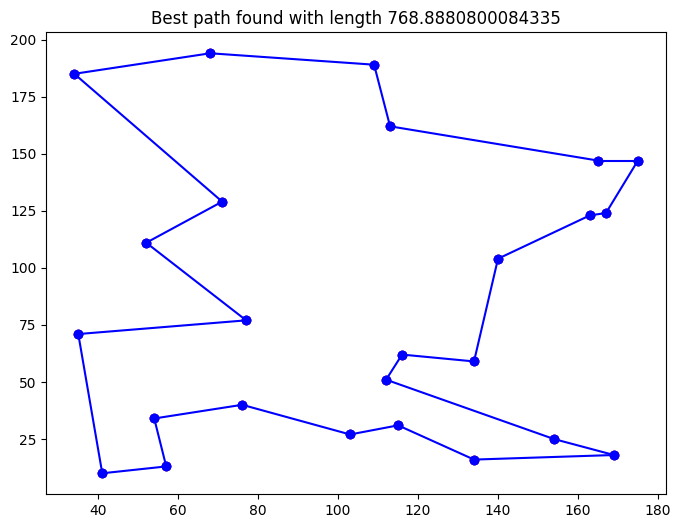

In [33]:
# Running the ACO algorithm and plotting the best path
best_path, best_path_length = aco_tsp(distance_matrix, num_ants, num_iterations, alpha, beta, evaporation_rate, Q)
print(f"Best path found: {best_path} with length {best_path_length}")

# Plotting the best path
def plot_tsp_path(citylist, path):
    coordinates = [(city.x, city.y) for city in citylist]  # Extracting coordinates from City objects
    plt.figure(figsize=(8, 6))
    for i in range(len(path)):
        start = coordinates[path[i]]
        end = coordinates[path[(i + 1) % len(path)]]
        plt.plot([start[0], end[0]], [start[1], end[1]], 'bo-')
    plt.scatter(*zip(*coordinates), color='red')
    plt.title(f"Best path found with length {best_path_length}")
    plt.show()

plot_tsp_path(citylist, best_path)
